# Using Scikit-Learn Neural Network Class to classify MNIST
> Not everytime need to use Deep Learning Library.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]


# About

Yann LeCun's MNIST is the most "used" dataset in Machine Learning I believe, lot's ML/DL practitioner will use it as the "Hello World" problem in Machine Learning, it's old, but golden, Even [Geoffrey Hinton's Capsule Network](https://en.wikipedia.org/wiki/Capsule_neural_network) also using MNIST as testing. 

Most the tutorial online will guide the learner to use TensorFlow or Keras or PyTorch library to tackle MNIST problem, but actually it's not necessary， there's multiple solution for a single problem, we can tackle MNIST problem by "Pure" Python code, crafting the algorithm from scratch, or using the convential Machine Learning Library [Scikit-Learn](https://scikit-learn.org/stable/) `MLPClassifier`

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

In [3]:
# load the data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

Next we going to bulid a single hidden layer MLP model

In [4]:
mlp = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=10, alpha=1e-4, 
                    solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)

In [5]:
# start the training
mlp.fit(X_train, y_train)

Iteration 1, loss = inf
Iteration 2, loss = 94144.72785948
Iteration 3, loss = 94116.48942606
Iteration 4, loss = 94088.25915097
Iteration 5, loss = 94060.03773325
Iteration 6, loss = 94031.82434269
Iteration 7, loss = 94003.61939577
Iteration 8, loss = 93975.42334401
Iteration 9, loss = 93947.23547037
Iteration 10, loss = 93919.05614157


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=10, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=False)

Obsiously the loss is abnormal, is because we didnt scale the data

In [7]:
X = X / 255.

In [8]:
# use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [10]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=10, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=10, warm_start=False)

In [12]:
print(f"Training set score: {mlp.score(X_train, y_train):.3f}")
print(f"Test set score: {mlp.score(X_test, y_test):.3f}")

Training set score: 0.987
Test set score: 0.970


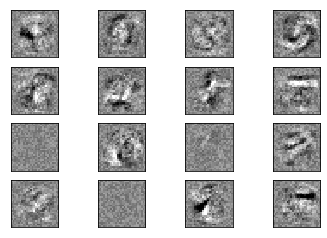

In [13]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()